# Build and validate a linear model

In this example we are going to build a linear regression model and validate it numerically and graphically.

In [1]:
from __future__ import print_function
import openturns as ot

In [2]:
# Generate X,Y samples
N = 1000
Xsample = ot.Triangular(1.0, 5.0, 10.0).getSample(N)
Ysample = Xsample * 3.0 + ot.Normal(0.5, 1.0).getSample(N)

In [3]:
# Generate a particular scalar sampleX
particularXSample = ot.Triangular(1.0, 5.0, 10.0).getSample(N)

In [4]:
# Create the linear model from Y,X samples
linearRegressionModel = ot.LinearModelFactory().build(Xsample, Ysample, 0.9)

# Get the coefficients ai
print("coefficients of the linear regression model = ", linearRegressionModel.getRegression())

# Get the confidence intervals of the ai coefficients
print("confidence intervals of the coefficients = ", linearRegressionModel.getConfidenceIntervals())


coefficients of the linear regression model =  [0.592409,2.98159]
confidence intervals of the coefficients =  [0.470224, 0.714594]
[2.95996, 3.00321]


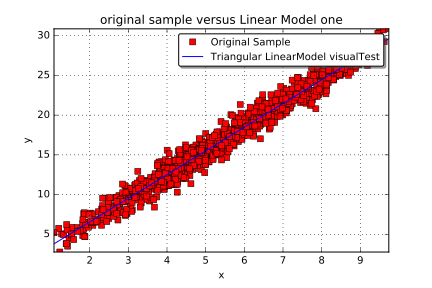

In [5]:
# Validate the model with a visual test
ot.VisualTest.DrawLinearModel(Xsample, Ysample, linearRegressionModel)

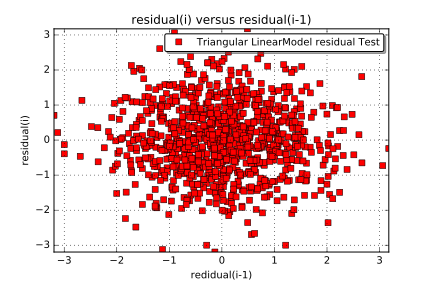

In [6]:
# Draw the graph of the residual values
ot.VisualTest.DrawLinearModelResidual(Xsample, Ysample, linearRegressionModel)

In [7]:
# Check the quality of the linear regression model through the R^2 indicator
resultLinearModelRSquared = ot.LinearModelTest.LinearModelRSquared(Xsample, Ysample, linearRegressionModel, 0.90)
print("Test Success ? ", resultLinearModelRSquared.getBinaryQualityMeasure())
print("p-value of the LinearModelRSquared Test = ", resultLinearModelRSquared.getPValue())# R^2 value
print("p-value threshold = ", resultLinearModelRSquared.getThreshold())# R^2 @ level

Test Success ?  True
p-value of the LinearModelRSquared Test =  0.969066896984889
p-value threshold =  0.9


In [8]:
# Check the quality of the linear regression model through the adjusted R^2 indicator
resultLinearModelAdjustedRSquared = ot.LinearModelTest.LinearModelAdjustedRSquared(Xsample, Ysample, linearRegressionModel, 0.90)
print("Test Success ? ", resultLinearModelAdjustedRSquared.getBinaryQualityMeasure())
print("p-value of the LinearModelRSquared Test = ", resultLinearModelAdjustedRSquared.getPValue())# R^2 value
print("p-value threshold = ", resultLinearModelAdjustedRSquared.getThreshold())# R^2 @ level

Test Success ?  True
p-value of the LinearModelRSquared Test =  0.9690359018916874
p-value threshold =  0.9


In [9]:
# Check the nullity of the regression linear model coefficients
resultLinearModelFisher = ot.LinearModelTest.LinearModelFisher(Xsample, Ysample, linearRegressionModel, 0.90)
print("Test Success ? ", resultLinearModelFisher.getBinaryQualityMeasure())
print("p-value of the LinearModelRSquared Test = ", resultLinearModelFisher.getPValue())
print("p-value threshold = ", resultLinearModelFisher.getThreshold())

Test Success ?  False
p-value of the LinearModelRSquared Test =  1.0
p-value threshold =  0.09999999999999998


In [10]:
# Check, under the hypothesis of a gaussian sample, if the mean of the residual is equal to zero
resultLinearModelResidualMean = ot.LinearModelTest.LinearModelResidualMean(Xsample, Ysample, linearRegressionModel, 0.90)
print("Test Success ? ", resultLinearModelResidualMean.getBinaryQualityMeasure())
print("p-value of the LinearModelRSquared Test = ", resultLinearModelResidualMean.getPValue())
print("p-value threshold = ", resultLinearModelResidualMean.getThreshold())

Test Success ?  True
p-value of the LinearModelRSquared Test =  0.9999999999997247
p-value threshold =  0.09999999999999998
